# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [32]:
Who: My classmates and teachers
What: To inform them about detecting network threats and anomaly detection
How: By using graphs and data to visualize the information

SyntaxError: invalid syntax (2131742901.py, line 1)

# 3. Homework - work with your own data

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [34]:
# Download the latest version of the dataset
cybersecurity_data_path = kagglehub.dataset_download("teamincribo/cyber-security-attacks")
print("Path to dataset files:", cybersecurity_data_path)
# Construct the full cybersecurity_data_path to the CSV file (update the file name if necessary)
csv_file = os.path.join(cybersecurity_data_path, "cybersecurity_attacks.csv")
# Read the dataset into a DataFrame
cybersecurity_data = pd.read_csv(csv_file)

# Download the latest version of the dataset
unsw_data_path = kagglehub.dataset_download("dhoogla/unswnb15")
print("Path to dataset files:", unsw_data_path)
# Construct the full cybersecurity_data_path to the CSV file (update the file name if necessary)
csv_file = os.path.join(unsw_data_path, "UNSW_NB15_training-set.parquet")
# Read the dataset into a DataFrame
unsw_data = pd.read_parquet(csv_file)


Path to dataset files: C:\Users\luank\.cache\kagglehub\datasets\teamincribo\cyber-security-attacks\versions\20
Path to dataset files: C:\Users\luank\.cache\kagglehub\datasets\dhoogla\unswnb15\versions\5


In [35]:
#cyber security cybersecurity_data exploration
print("Cybersecurity Data Overview:")
print(cybersecurity_data.head())
print("\nData Types:")
print(cybersecurity_data.dtypes)
print("\nMissing Values:")
print(cybersecurity_data.isnull().sum())
print("\nDescriptive Statistics:")
print(cybersecurity_data.describe())
print("\nData Shape:")
print(cybersecurity_data.shape)
print("\nColumn Names:")
print(cybersecurity_data.columns.tolist())


Cybersecurity Data Overview:
             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ...

In [36]:

cybersecurity_data.rename(columns={'Timestamp':'Datetime'}, inplace=True)
cybersecurity_data['Datetime'] = cybersecurity_data['Datetime'].apply(lambda x: pd.to_datetime(x))

In [37]:
print("Cybersecurity Data Overview:")
print(cybersecurity_data.head())

Cybersecurity Data Overview:
             Datetime Source IP Address Destination IP Address  Source Port  \
0 2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1 2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2 2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3 2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4 2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Actio

In [ ]:
missing_columns = ['Alerts/Warnings', 'IDS/IPS Alerts', 'Malware Indicators', 'Firewall Logs', 'Proxy Information']
# fill missing values 
fillvalaues = ['None', 'No Data', 'No Detected', 'No Data', 'No Proxy Data']
for i in range(len(fillvalaues)):
    cybersecurity_data.fillna({missing_columns[i]: fillvalaues[i]},inplace=True)

cybersecurity_data.isnull().sum()

Datetime                  0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

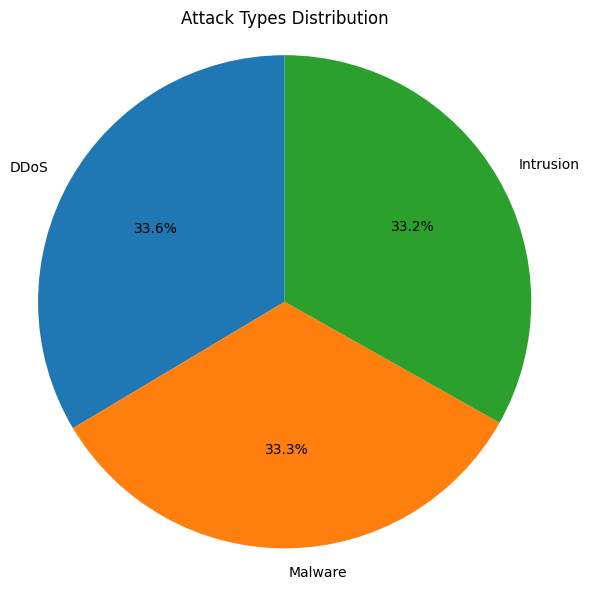

In [ ]:
# Get attack type counts and labels
attack_counts = cybersecurity_data["Attack Type"].value_counts()
labels = attack_counts.index

plt.figure(figsize=(7, 7))
plt.pie(attack_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Attack Types Distribution')
plt.axis('equal')
plt.show()

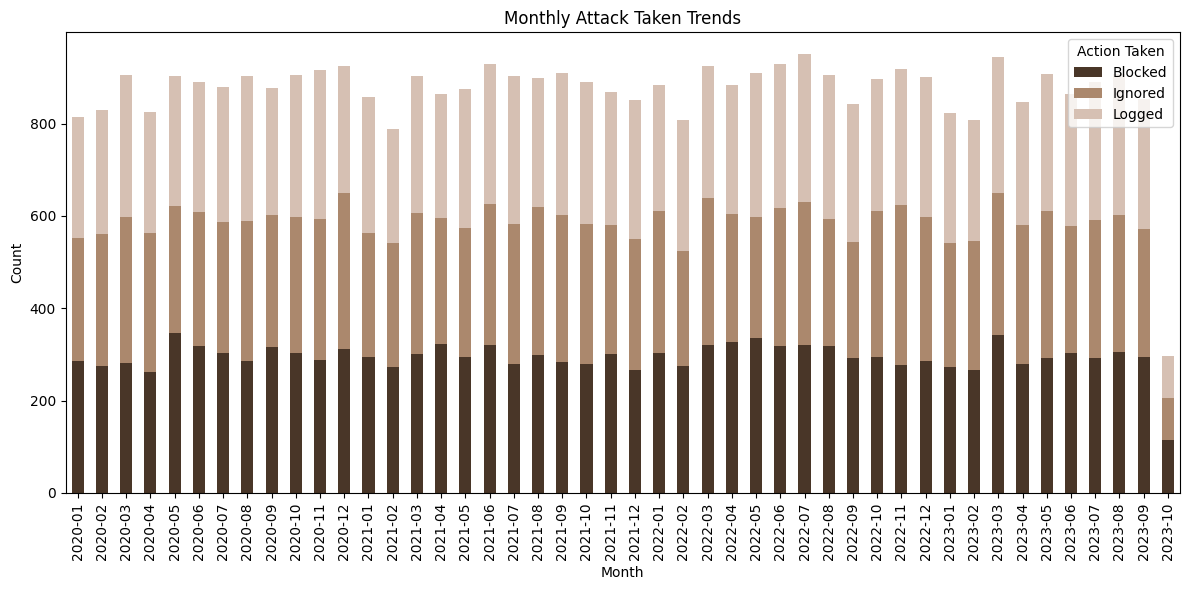

In [ ]:
# Group by month and action taken
action_taken_month = cybersecurity_data.groupby([
    cybersecurity_data['Datetime'].dt.to_period('M'),
    'Action Taken'
]).size().unstack(fill_value=0)

# Plot
action_taken_month.index = action_taken_month.index.astype(str)
action_taken_month.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#493628', '#AB886D', '#D6C0B3'])
plt.title('Monthly Attack Taken Trends')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Action Taken')
plt.tight_layout()
plt.show()


In [ ]:
#unsw_data exploration
print("UNSW Data Overview:")
print(unsw_data.head())
print("\nData Types:")
print(unsw_data.dtypes)
print("\nMissing Values:")
print(unsw_data.isnull().sum())
print("\nDescriptive Statistics:")
print(unsw_data.describe())
print("\nData Shape:")
print(unsw_data.shape)
print("\nColumn Names:")
print(unsw_data.columns.tolist())


UNSW Data Overview:
        dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087486   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473373   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373825   

          sload  ...  trans_depth  response_body_len  ct_src_dport_ltm  \
0  14158.942383  ...            0                  0                 1   
1   8395.112305  ...            0                  0                 1   
2   1572.271851  ...            0                  0                 1   
3   2740.178955  ...            0                  0                 1   
4   8561.499023  ...            0                  0                 2   

   ct_dst_sport_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0          

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.